In [1]:
from utils import *
from octis.dataset.dataset import Dataset
from bertopic import BERTopic
import matplotlib.pyplot as plt

In [65]:
df = get_processed_data_bertopic()
data = df['Processed Summary'].tolist()

dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis")

# Simple BERTopic

In [5]:
topic_model = BERTopic(calculate_probabilities=True)
topics, probs = topic_model.fit_transform(data)
topic_info = topic_model.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info[topic_info['Topic'] == -1]['Count']}")

Number of topics: 379
Number of outliers: 0    13468
Name: Count, dtype: int64


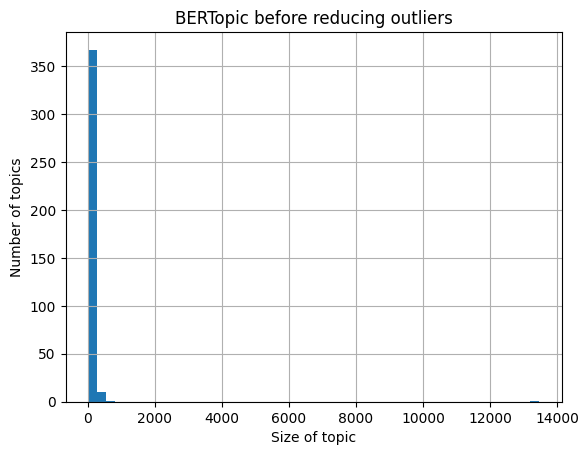

In [6]:
topic_info.hist(column='Count', bins=50)
plt.xlabel("Size of topic")
plt.ylabel("Number of topics")
plt.title("BERTopic before reducing outliers")
plt.show()

In [6]:
# def get_bertopic_model_output(topic_model: bertopic.BERTopic) -> typing.Dict:
#     model_output = dict()
#     model_output['topics'] = topic_model.get_topic_info()['Representation'].tolist()
#     model_output['topic-word-matrix'] = topic_model.c_tf_idf_.toarray()
#     model_output['topic-document-matrix'] = topic_model.probabilities_
# 
#     return model_output

In [7]:
model_output = get_bertopic_model_output(topic_model)

In [8]:
results_bertopic = calculate_metrics(model_output, dataset, verbose=False)

UMass: -6.018936965231936
NPMI: 0.08345348369187004
C_V: 0.5585226161337192
Topic Diversity: 0.6461333333333333
Inverted RBO: 0.9963968218719779
Pairwise Jaccard: 0.002785236522989273
KL Uniform: 3.3521553933361368
Error calculating KL Vacuous: index 375 is out of bounds for axis 0 with size 375
KL Vacuous: None
KL Background: 1.3358345869903614


In [12]:
# convert to a pandas dataframe
import pandas as pd
df = pd.DataFrame(results_bertopic.values(), index=results_bertopic.keys()).T
df

,UMass,NPMI,C_V,Topic Diversity,Inverted RBO,Pairwise Jaccard,KL Uniform,KL Vacuous,KL Background
0,-6.018937,0.083453,0.558523,0.646133,0.996397,0.002785,3.352155,NaN,1.335835


# Reducing outliers

In [7]:
new_topics = topic_model.reduce_outliers(data, topics)
topic_model.update_topics(data, topics=new_topics)
topic_info2 = topic_model.get_topic_info()
print(f"Number of topics: {len(topic_info2)}")
print(f"Number of outliers: {topic_info2[topic_info['Topic'] == -1]['Count']}")

2024-12-03 17:57:21,664 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


Number of topics: 378
Number of outliers: 0    657
Name: Count, dtype: int64


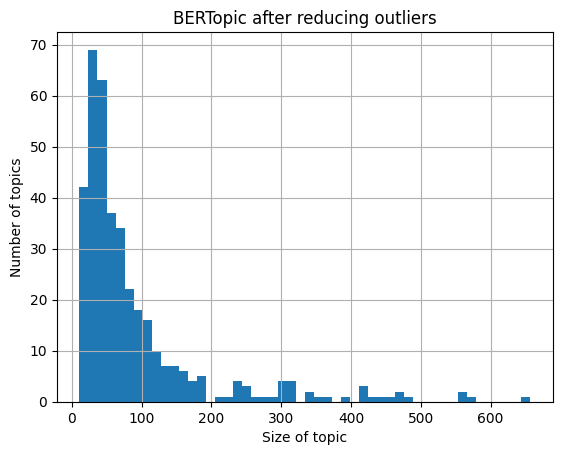

In [8]:
topic_info2.hist(column='Count', bins=50)
plt.xlabel("Size of topic")
plt.ylabel("Number of topics")
plt.title("BERTopic after reducing outliers")
plt.show()

In [9]:
topic_info2

,Topic,Count,Name,Representation,Representative_Docs
0,0,657,0_game_player_playing_chess,"[game, player, playing, chess, level, play, op...",[representing game pixel offer promising appro...
1,1,573,1_dialogue_dialog_conversation_response,"[dialogue, dialog, conversation, response, con...",[unsupervised dialogue structure learning impo...
2,2,558,2_driving_vehicle_traffic_autonomous,"[driving, vehicle, traffic, autonomous, road, ...",[traffic system random complex large system di...
3,3,556,3_bayesian_probability_variable_probabilistic,"[bayesian, probability, variable, probabilisti...",[bayesian network probabilistic graphical mode...
4,4,466,4_recommendation_item_recommender_user,"[recommendation, item, recommender, user, pref...",[paper investigate recommendation task common ...
...,...,...,...,...,...
373,373,30,373_scene_4d_physic_physical,"[scene, 4d, physic, physical, dynamic, intuiti...",[given visual scene human strong intuition sce...
374,374,58,374_communication_message_sender_communicate,"[communication, message, sender, communicate, ...",[field emergent communication aim understand c...
375,375,25,375_bo_surrogate_gp_optimization,"[bo, surrogate, gp, optimization, ann, functio...",[bayesian optimization bo guided gaussian proc...
376,376,29,376_default_nc_closure_preferential,"[default, nc, closure, preferential, rational,...",[philosopher writing raven paradox often note ...


In [10]:
topic_model.get_representative_docs(362)

['background dental caries diagnosis requires manual inspection diagnostic bitewing image patient followed visual inspection probing identified dental piece potential lesion yet use artificial intelligence particular potential aid diagnosis providing quick informative analysis bitewing image method dataset bitewing hunt4 oral health study annotated individually six different expert used train three different object detection architecture retinanet resnet50 yolov5 size efficientdet d0 d1 size consensus dataset 197 image annotated jointly six dentist used evaluation cross validation scheme used evaluate performance ai model result trained model show increase average precision decrease false negative rate respect dental clinician compared dental clinician yolov5 model show largest improvement reporting mean average precision mean mean false negative rate whereas best annotator metric reported respectively conclusion model shown potential assist dental professional diagnosis caries yet tas

In [64]:
df_original = get_processed_data_bertopic()

In [26]:
representative_docs = topic_model.get_representative_docs(372)

In [42]:
links = []
for doc in representative_docs:
    links.append(df_original[df_original['Processed Summary'] == doc]['ID'].values[0])

In [43]:
links

['http://arxiv.org/abs/2404.15516v1',
 'http://arxiv.org/abs/2310.05473v1',
 'http://arxiv.org/abs/2404.11317v2']

In [54]:
# look through all papers and check if the keywords: "composed" "image" "retrieval" are present
ids = []
for i, title in enumerate(df_original['Title']):
    # print(title)
    title = title.lower()
    if "composed" in title and "image" in title and "retrieval" in title:
        print(i, title)
        ids.append(i)

25269 dual relation alignment for composed image retrieval
26294 sentence-level prompts benefit composed image retrieval
31696 improving composed image retrieval via contrastive learning with scaling   positives and negatives
31912 visual delta generator with large multi-modal models for semi-supervised   composed image retrieval
32180 spherical linear interpolation and text-anchoring for zero-shot composed   image retrieval


In [46]:
# check which topics were assigned to the papers
topics = []
for i in ids:
    topics.append(topic_model.transform([data[i]])[0])

In [47]:
topics

[[372], [372], [-1], [-1], [-1]]

In [13]:
# find the representative documents for each topic
doc = representative_docs[0]


In [17]:
# find the index of the document in the original dataset searching by the summary
df_original[df_original['Processed Summary'] == doc]

,ID,Title,Summary,Published,PDF Link,Processed Summary
25975,http://arxiv.org/abs/2310.00354v3,AI-Dentify: Deep learning for proximal caries ...,Background: Dental caries diagnosis requires t...,2023-09-30T12:17:36Z,http://arxiv.org/pdf/2310.00354v3,background dental caries diagnosis requires ma...


In [16]:
df_original.head()

,ID,Title,Summary,Published,PDF Link,Processed Summary
0,http://arxiv.org/abs/cs/0002002v1,Uniform semantic treatment of default and auto...,We revisit the issue of connections between tw...,2000-02-03T21:44:57Z,http://arxiv.org/pdf/cs/0002002v1,revisit issue connection two leading formalism...
1,http://arxiv.org/abs/cs/0002003v1,On the accuracy and running time of GSAT,Randomized algorithms for deciding satisfiabil...,2000-02-04T12:53:57Z,http://arxiv.org/pdf/cs/0002003v1,randomized algorithm deciding satisfiability s...
2,http://arxiv.org/abs/cs/0002009v1,Syntactic Autonomy: Why There is no Autonomy w...,Two different types of agency are discussed ba...,2000-02-16T18:09:20Z,http://arxiv.org/pdf/cs/0002009v1,two different type agency discussed based dyna...
3,http://arxiv.org/abs/cs/0003008v1,Consistency Management of Normal Logic Program...,This paper presents a method of computing a re...,2000-03-05T10:29:03Z,http://arxiv.org/pdf/cs/0003008v1,paper present method computing revision normal...
4,http://arxiv.org/abs/cs/0003016v1,Abductive and Consistency-Based Diagnosis Revi...,Diagnostic reasoning has been characterized lo...,2000-03-07T11:39:53Z,http://arxiv.org/pdf/cs/0003016v1,diagnostic reasoning characterized logically r...


In [11]:
model_output = get_bertopic_model_output(topic_model)

In [12]:
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -5.486193563352657
NPMI: 0.09446816832986273
C_V: 0.5796806544882305
Topic Diversity: 0.6158031088082901
Inverted RBO: 0.9959740195319101
Pairwise Jaccard: 0.0032548585622447527
KL Uniform: None
KL Vacuous: None
KL Background: 1.3369104398069989


# Auto topic number

In [13]:
topic_model_less_topics = BERTopic(calculate_probabilities=True, nr_topics="auto")
topics, probs = topic_model_less_topics.fit_transform(data)
topic_info = topic_model_less_topics.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info[topic_info['Topic'] == -1]['Count']}")

Number of topics: 103
Number of outliers: 0    13909
Name: Count, dtype: int64


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

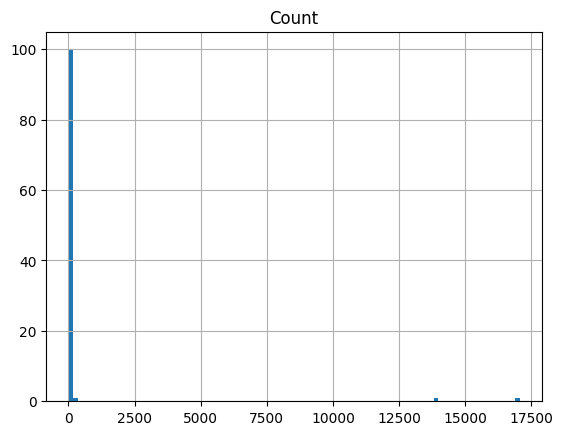

In [14]:
topic_info.hist(column='Count', bins=100)

In [15]:
model_output = get_bertopic_model_output(topic_model_less_topics)

In [16]:
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -5.304019168703258
NPMI: 0.08633875178899669
C_V: 0.5356901512928797
Topic Diversity: 0.8087378640776699
Inverted RBO: 0.995614940027621
Pairwise Jaccard: 0.003870630915238785
KL Uniform: None
KL Vacuous: None
KL Background: 3.218383183850171


# Reducing outliers

In [17]:
new_topics = topic_model_less_topics.reduce_outliers(data, topics)
topic_model_less_topics.update_topics(data, topics=new_topics)
topic_info = topic_model_less_topics.get_topic_info()
print(f"Number of topics: {len(topic_info)}")
print(f"Number of outliers: {topic_info[topic_info['Topic'] == -1]['Count']}")

2024-11-19 20:40:04,967 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


Number of topics: 102
Number of outliers: Series([], Name: Count, dtype: int64)


array([[<Axes: title={'center': 'Count'}>]], dtype=object)

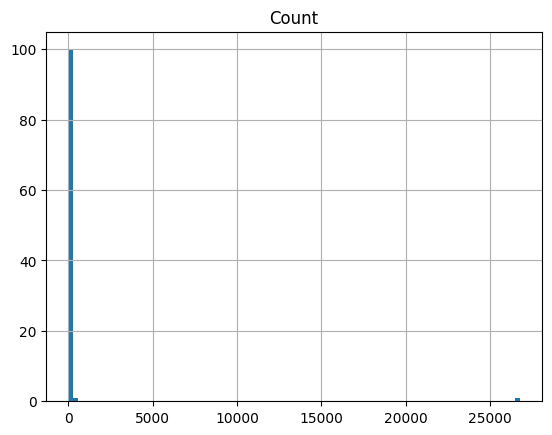

In [18]:
topic_info.hist(column='Count', bins=100)

In [20]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,0,26746,0_model_learning_method_task,"[model, learning, method, task, data, approach, performance, problem, network, language]","[advance digital technology classification medical image become crucial step clinical decision support system automatic medical image classification represents pivotal domain use ai hold potential create significant social impact however several challenge act obstacle development practical effective solution one challenge prevalent class imbalance problem medical imaging datasets result existing ai technique particularly methodology often underperform scenario study propose novel framework called large margin aware focal lmf loss mitigate class imbalance problem medical imaging lmf loss represents linear combination two loss function optimized two hyperparameters framework harness distinct characteristic loss function enforcing wider margin minority class simultaneously emphasizing challenging sample found datasets perform rigorous experiment three neural network architecture four medical imaging datasets provide empirical evidence proposed framework consistently outperforms baseline method showing improvement 2 score analysis f1 score also demonstrate proposed framework significantly improve performance minority class result experiment show proposed framework perform consistently well across different architecture datasets overall study demonstrates simple effective approach addressing class imbalance problem medical imaging datasets hope work inspire new research toward generalized approach medical image classification, recent time large language model llm made significant stride generating computer code blurring line code created human code produced artificial intelligence ai technology evolve rapidly crucial explore influence code generation especially given risk misuse area like higher education paper explores issue using advanced classification technique differentiate code written human generated chatgpt type llm employ new approach combine powerful embedding feature supervised learning algorithm including deep neural network random forest extreme gradient boosting achieve differentiation impressive accuracy 98 successful combination also examine model calibration showing model extremely well calibrated additionally present feature interpretable bayes classifier elucidate critical difference code source enhancing explainability transparency approach approach work well provide accuracy also show untrained human solve task better random guessing study crucial understanding mitigating potential risk associated using ai code generation particularly context higher education software development competitive programming, recent development neural language modeling led leap accuracy commonsense benchmark however increasing concern model overfit specific task without learning utilize external knowledge perform general semantic reasoning contrast evaluation shown promise robust measure model general reasoning ability paper propose novel framework question answering across commonsense task guided set hypothesis framework study transform various knowledge resource form effective model vary set language model training regime knowledge source data generation strategy measure impact across task extending prior work devise compare four constrained strategy provide empirical result across five commonsense task data generated five external knowledge resource show individual knowledge graph better suited specific task global knowledge graph brings consistent gain across different task addition preserving structure task well generating fair informative question help language model learn effectively]"
1,1,349,1_causal_causality_variable_effect,"[causal, causality, variable, effect, observational, discovery, cause, intervention, relationship, structure]","[many field scientific research application unbiased estimation causal effect data crucial understanding mec

In [19]:
model_output = get_bertopic_model_output(topic_model_less_topics)
results_bertopic = calculate_metrics(model_output, dataset, verbose=True)

UMass: -4.307763226755346
NPMI: 0.10192969191140486
C_V: 0.5669481669767485
Topic Diversity: 0.7715686274509804
Inverted RBO: 0.9946013512200488
Pairwise Jaccard: 0.0049554536586421645
KL Uniform: None
KL Vacuous: None
KL Background: 3.218383183850171


# Removed scientific words

In [104]:
df = get_processed_data_bertopic(csv_file="../../data/arxiv_processed_no_scientific.csv")
data = df['Processed Summary'].tolist()

dataset = Dataset()
dataset.load_custom_dataset_from_folder("../../data/octis_no_scientific")

In [105]:
topic_no_sci = BERTopic(calculate_probabilities=True)
topics_sci, probs_sci = topic_no_sci.fit_transform(data)
topic_info_sci = topic_no_sci.get_topic_info()


In [106]:
print(f"Number of topics: {len(topic_info_sci)}")

Number of topics: 396


In [107]:
topic_info_sci

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13350,-1_learning_agent_task_human,"[learning, agent, task, human, system, languag...",[large language llm shown increasing power var...
1,0,580,0_dialogue_dialog_conversation_conversational,"[dialogue, dialog, conversation, conversationa...",[dialogue system application customer support ...
2,1,456,1_driving_vehicle_traffic_autonomous,"[driving, vehicle, traffic, autonomous, road, ...",[driving behavior connected vehicle technology...
3,2,436,2_recommendation_item_recommender_user,"[recommendation, item, recommender, user, pref...",[recommender system knowledge graph effectivel...
4,3,415,3_robot_navigation_planning_environment,"[robot, navigation, planning, environment, rob...",[situation human robot moving space whilst per...
...,...,...,...,...,...
391,390,10,390_semantics_aft_expressiveness_negation,"[semantics, aft, expressiveness, negation, pro...",[stable semantics become popular management ne...
392,391,10,391_collapsed_proposal_program_collapsing,"[collapsed, proposal, program, collapsing, pro...",[introduce collapsed compilation approximate i...
393,392,10,392_geometric_equivariant_disgnn_dgnn,"[geometric, equivariant, disgnn, dgnn, empsns,...",[invariant one important class geometric deep ...
394,393,10,393_gesture_hand_wiopen_osgr,"[gesture, hand, wiopen, osgr, semg, movement, ...",[recognition dynamic hand gesture video stream...


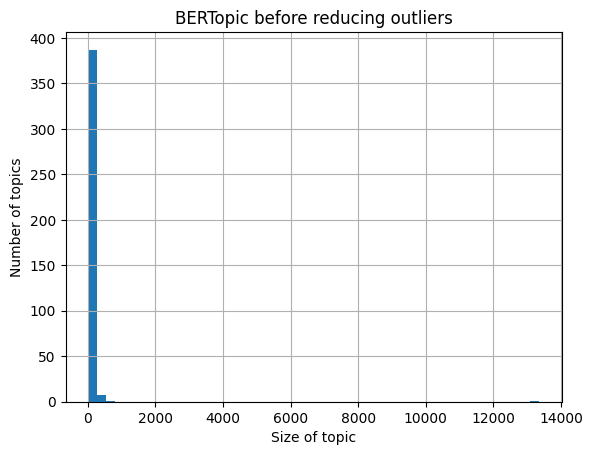

In [109]:
topic_info_sci.hist(column='Count', bins=50)
plt.xlabel("Size of topic")
plt.ylabel("Number of topics")
plt.title("BERTopic before reducing outliers")
plt.show()

In [110]:
model_output_sci = get_bertopic_model_output(topic_no_sci)
results_bertopic_sci = calculate_metrics(model_output_sci, dataset, verbose=False)

Error calculating KL Vacuous: index 396 is out of bounds for axis 0 with size 396


TypeError: 'numpy.ndarray' object is not callable

In [111]:
results_bertopic_sci

,UMass,NPMI,C_V,Topic Diversity,Inverted RBO,Pairwise Jaccard,KL Uniform,KL Vacuous,KL Background
0,-6.427072,0.077667,0.549126,0.660859,0.99676,0.002455,3.409831,NaN,1.353695


In [112]:
new_tops_sci = topic_no_sci.reduce_outliers(data, topics_sci)
topic_no_sci.update_topics(data, topics=new_tops_sci)
topic_info_sci = topic_no_sci.get_topic_info()

2024-12-03 22:22:57,372 - BERTopic - WARNING: Using a custom list of topic assignments may lead to errors if topic reduction techniques are used afterwards. Make sure that manually assigning topics is the last step in the pipeline.Note that topic embeddings will also be created through weightedc-TF-IDF embeddings instead of centroid embeddings.


In [113]:
topic_info_sci

,Topic,Count,Name,Representation,Representative_Docs
0,0,605,0_dialogue_dialog_conversation_conversational,"[dialogue, dialog, conversation, conversationa...",[dialogue system application customer support ...
1,1,526,1_driving_vehicle_traffic_autonomous,"[driving, vehicle, traffic, autonomous, road, ...",[driving behavior connected vehicle technology...
2,2,497,2_recommendation_item_recommender_user,"[recommendation, item, recommender, user, pref...",[recommender system knowledge graph effectivel...
3,3,587,3_robot_navigation_environment_planning,"[robot, navigation, environment, planning, rob...",[situation human robot moving space whilst per...
4,4,376,4_fl_federated_client_privacy,"[fl, federated, client, privacy, server, local...",[federated learning fl emerged effective learn...
...,...,...,...,...,...
390,390,29,390_negation_semantics_expressiveness_logic,"[negation, semantics, expressiveness, logic, n...",[stable semantics become popular management ne...
391,391,18,391_proposal_posterior_sampler_probabilistic,"[proposal, posterior, sampler, probabilistic, ...",[introduce collapsed compilation approximate i...
392,392,30,392_equivariant_geometric_invariant_conceptual,"[equivariant, geometric, invariant, conceptual...",[invariant one important class geometric deep ...
393,393,19,393_gesture_hand_keyboard_movement,"[gesture, hand, keyboard, movement, recognitio...",[recognition dynamic hand gesture video stream...


In [115]:
model_output_sci = get_bertopic_model_output(topic_no_sci)
results_bertopic_sci_2 = calculate_metrics(model_output_sci, dataset, verbose=True)

UMass: -5.763123050126857
NPMI: 0.09336689128449857
C_V: 0.5723087322551003
Topic Diversity: 0.6316455696202532
Inverted RBO: 0.9964378137162925
Pairwise Jaccard: 0.00293463540432971
KL Uniform: 3.0426070680237567
Error calculating KL Vacuous: index 395 is out of bounds for axis 0 with size 395
KL Vacuous: None
KL Background: 1.3536946664232796
